In [4]:
# --- Imports
import numpy as np
from random import random, seed
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Model imports
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


# --- Settings
sns.set_theme(style='whitegrid')

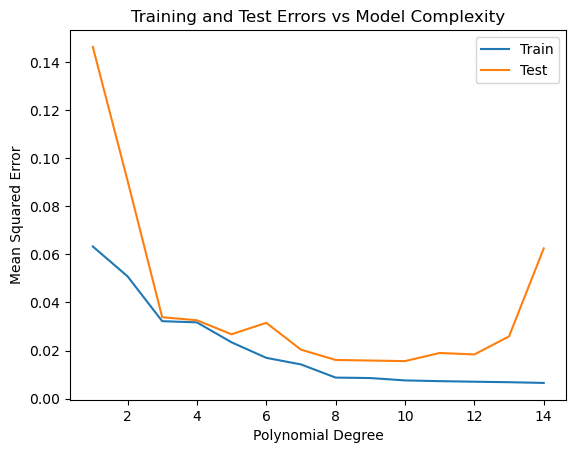

In [11]:
MSE_test, MSE_train = np.zeros((50, 14)), np.zeros((50, 14))

np.random.seed(3)

for i in range(50):
    n = 50
    # Make data set.
    x = np.linspace(-3, 3, n).reshape(-1, 1)
    y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
    
    # Splitting the data into train and test
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)

    mse_train = np.zeros(14)
    mse_test = np.zeros(14)
    degrees = list(range(1,15))
    for deg in degrees:
        # Fitting the data
        model = make_pipeline(
            PolynomialFeatures(degree=deg),
            LinearRegression()
            )

        model.fit(X_train, Y_train)

        y_predict_train = model.predict(X_train)
        y_predict_test = model.predict(X_test)

        # calculating the MSE for the train and test dataset
        mse_train[deg-1] = mean_squared_error(Y_train, y_predict_train)
        mse_test[deg-1] = mean_squared_error(Y_test, y_predict_test)

    MSE_train[i] = mse_train
    MSE_test[i] = mse_test

    MSE_train_mean = np.mean(MSE_train, axis=0)
    MSE_test_mean = np.mean(MSE_test, axis=0)

plt.plot(degrees, MSE_train_mean, label='Train')
plt.plot(degrees, MSE_test_mean, label='Test')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors vs Model Complexity')
plt.legend()
plt.show()


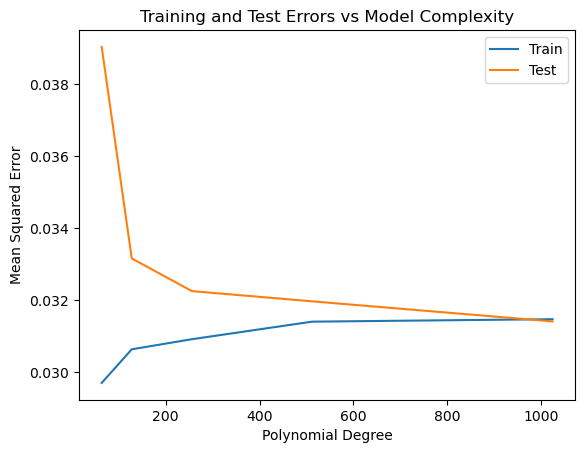

In [22]:
MSE_test, MSE_train = np.zeros((50, 5)), np.zeros((50, 5))

np.random.seed(3)

num_list = np.logspace(6, 10, 5, base=2).astype(int)

for i in range(50):
    mse_train = np.zeros(5)
    mse_test = np.zeros(5)

    # Fitting the data
    model = make_pipeline(
            PolynomialFeatures(degree=3),
            LinearRegression()
            )

    for idx, n in enumerate(num_list):
        # Make data set.
        x = np.linspace(-3, 3, n).reshape(-1, 1)
        y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
        
        # Splitting the data into train and test
        X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

        model.fit(X_train, Y_train)

        y_predict_train = model.predict(X_train)
        y_predict_test = model.predict(X_test)

        # calculating the MSE for the train and test dataset
        mse_train[idx] = mean_squared_error(Y_train, y_predict_train)
        mse_test[idx] = mean_squared_error(Y_test, y_predict_test)

    MSE_train[i] = mse_train
    MSE_test[i] = mse_test

    MSE_train_mean = np.mean(MSE_train, axis=0)
    MSE_test_mean = np.mean(MSE_test, axis=0)

plt.plot(num_list, MSE_train_mean, label='Train')
plt.plot(num_list, MSE_test_mean, label='Test')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors vs Model Complexity')
plt.legend()
plt.show()


### Franke Function

In [5]:
def FrankeFunction(x,y): # From excercise description
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

### Degree of polynomial

In [6]:
# Making data
n = 100
x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
x, y = np.meshgrid(x,y)
# Unraveling to n^2-arrays
x = x.ravel()
y = y.ravel()

k = .01 # noise coefficient
z = FrankeFunction(x,y) + k*np.random.randn(n**2) # target variable with standard normal noise

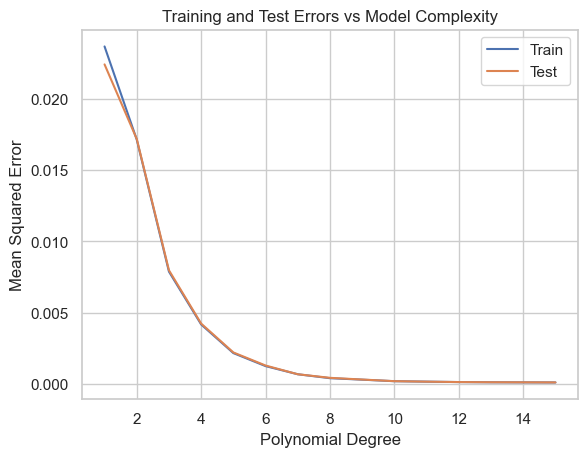

In [11]:
np.random.seed(3)

max_degree = 15


X = np.column_stack((x,y))
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)

# Splitting the data into train and test
MSE_train = np.zeros(max_degree)
MSE_test = np.zeros(max_degree)
degrees = list(range(1,max_degree+1))
for idx, deg in enumerate(degrees):
    # Fitting the data
    model = make_pipeline(
        PolynomialFeatures(degree=deg),
        LinearRegression()
        )

    model.fit(X_train, z_train)

    y_predict_train = model.predict(X_train)
    y_predict_test = model.predict(X_test)

    # calculating the MSE for the train and test dataset
    MSE_train[idx] = mean_squared_error(z_train, y_predict_train)
    MSE_test[idx] = mean_squared_error(z_test, y_predict_test)

plt.plot(degrees, MSE_train, label='Train')
plt.plot(degrees, MSE_test, label='Test')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors vs Model Complexity')
plt.legend()
plt.show()


### Number of datapoints

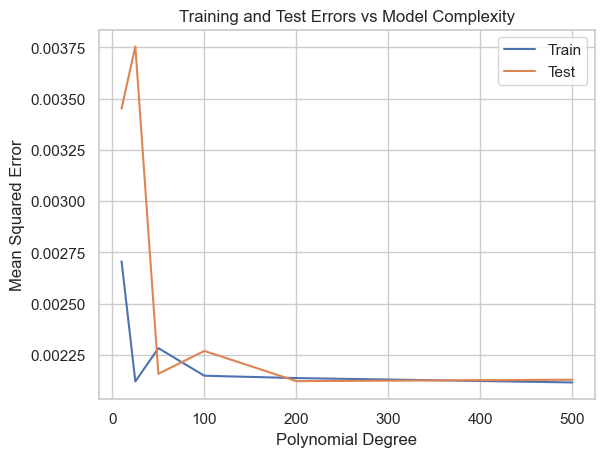

In [15]:
np.random.seed(3)

max_degree = 5

# Splitting the data into train and test
num_list = np.asarray([10, 25, 50, 100, 200, 500])
MSE_train = np.zeros(len(num_list))
MSE_test = np.zeros(len(num_list))
for idx, n in enumerate(num_list):
    # Making data
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    x, y = np.meshgrid(x,y)

    x = x.ravel()
    y = y.ravel()

    k = .01 # noise coefficient
    z = FrankeFunction(x,y) + k*np.random.randn(n**2) # target variable with standard normal noise

    # stacking x and y beside each other and splitting the data
    X = np.column_stack((x,y))
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=3)

    # Fitting the data
    model = make_pipeline(
        PolynomialFeatures(degree=max_degree),
        LinearRegression()
        )

    model.fit(X_train, z_train)

    y_predict_train = model.predict(X_train)
    y_predict_test = model.predict(X_test)

    # calculating the MSE for the train and test dataset
    MSE_train[idx] = mean_squared_error(z_train, y_predict_train)
    MSE_test[idx] = mean_squared_error(z_test, y_predict_test)

plt.plot(num_list, MSE_train, label='Train')
plt.plot(num_list, MSE_test, label='Test')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors vs Model Complexity')
plt.legend()
plt.show()
